# Movie Studio: Film's Data Analysis
![Getting Started](photo/R.jpg)

In [107]:
import pandas as pd
import calendar
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [91]:
data = pd.read_csv(r'zippedData\tn.movie_budgets.csv.gz')
print(data)

      id  release_date                                        movie  \
0      1  Dec 18, 2009                                       Avatar   
1      2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2      3   Jun 7, 2019                                 Dark Phoenix   
3      4   May 1, 2015                      Avengers: Age of Ultron   
4      5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   
...   ..           ...                                          ...   
5777  78  Dec 31, 2018                                       Red 11   
5778  79   Apr 2, 1999                                    Following   
5779  80  Jul 13, 2005                Return to the Land of Wonders   
5780  81  Sep 29, 2015                         A Plague So Pleasant   
5781  82   Aug 5, 2005                            My Date With Drew   

     production_budget domestic_gross worldwide_gross  
0         $425,000,000   $760,507,625  $2,776,345,279  
1         $410,600,000   $241,063,8

In [92]:
df_budget = pd.DataFrame(data)
df_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [93]:
df_budget.info()

#There is no missing data, or na values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [94]:
df_budget.shape

(5782, 6)

In [95]:
#We want to observe what type of data is the date column so we can work with it
#We want to analyze the date, in order to get the month and year

df_budget['Year'] = pd.DatetimeIndex(df_budget['release_date']).year
df_budget


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Year
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,2018
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",1999
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",2005
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,2015


In [96]:
df_budget['Year'].unique()

array([2009, 2011, 2019, 2015, 2017, 2018, 2007, 2012, 2013, 2010, 2016,
       2014, 2006, 2008, 2005, 1997, 2004, 1999, 1995, 2003, 2001, 2020,
       2002, 1998, 2000, 1991, 1994, 1996, 1993, 1992, 1988, 1990, 1989,
       1978, 1981, 1984, 1982, 1985, 1980, 1963, 1987, 1986, 1983, 1979,
       1977, 1970, 1969, 1976, 1965, 1962, 1964, 1959, 1966, 1974, 1956,
       1975, 1973, 1960, 1967, 1968, 1971, 1951, 1972, 1961, 1946, 1944,
       1953, 1954, 1957, 1952, 1930, 1939, 1925, 1950, 1948, 1958, 1943,
       1940, 1945, 1947, 1938, 1927, 1949, 1955, 1936, 1937, 1941, 1942,
       1933, 1935, 1931, 1916, 1929, 1934, 1915, 1920], dtype=int64)

In [97]:
df_budget['Month'] = pd.DatetimeIndex(df_budget['release_date']).month
df_budget['Month'] = df_budget['Month'].apply(lambda x: calendar.month_abbr[x])
df_budget



,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Year,Month
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009,Dec
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,May
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,Jun
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015,May
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017,Dec
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,2018,Dec
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",1999,Apr
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",2005,Jul
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,2015,Sep


In [98]:
df_budget['Day'] = pd.DatetimeIndex(df_budget['release_date']).day
df_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Year,Month,Day
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009,Dec,18
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,May,20
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,Jun,7
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015,May,1
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017,Dec,15
...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,2018,Dec,31
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495",1999,Apr,2
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338",2005,Jul,13
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0,2015,Sep,29


In [99]:
#we clean the worldwide_column and change to float type
df_budget['worldwide_gross'] = df_budget.worldwide_gross.apply(lambda x:x.replace('$','').replace(',',''))
df_budget['worldwide_gross'] = df_budget['worldwide_gross'].astype(float)

df_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Year,Month,Day
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625",2.776345e+09,2009,Dec,18
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875",1.045664e+09,2011,May,20
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350",1.497624e+08,2019,Jun,7
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868",1.403014e+09,2015,May,1
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382",1.316722e+09,2017,Dec,15
...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,0.000000e+00,2018,Dec,31
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482",2.404950e+05,1999,Apr,2
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338",1.338000e+03,2005,Jul,13
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,0.000000e+00,2015,Sep,29


In [108]:
#we only let the data that is more updated
recent_movie_years = df_budget.query("Year >= 2005")
recent_movie_years

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Year,Month,Day
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625",2.776345e+09,2009,Dec,18
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875",1.045664e+09,2011,May,20
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350",1.497624e+08,2019,Jun,7
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868",1.403014e+09,2015,May,1
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382",1.316722e+09,2017,Dec,15
...,...,...,...,...,...,...,...,...,...
5775,76,"May 26, 2006",Cavite,"$7,000","$70,071",7.164400e+04,2006,May,26
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,0.000000e+00,2018,Dec,31
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338",1.338000e+03,2005,Jul,13
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,0.000000e+00,2015,Sep,29


In [112]:
top_months = recent_movie_years.groupby('Month')[['worldwide_gross']].median().sort_values(by='worldwide_gross', ascending=False)
top_months

,worldwide_gross
Month,
Nov,53572822.0
Jul,51134699.5
Feb,43980363.0
Jan,36146087.0
May,36005871.0
Aug,34820335.0
Jun,33018565.0
Mar,23190292.0
Sep,21620145.0


In [113]:
# Now we can reset the index so that the first column is called "Months"

top_months.index.name = "Month"
top_months.reset_index(inplace=True)
top_months

,Month,worldwide_gross
0,Nov,53572822.0
1,Jul,51134699.5
2,Feb,43980363.0
3,Jan,36146087.0
4,May,36005871.0
5,Aug,34820335.0
6,Jun,33018565.0
7,Mar,23190292.0
8,Sep,21620145.0
9,Apr,19174817.0


AttributeError: module 'matplotlib.pyplot' has no attribute 'x_label'

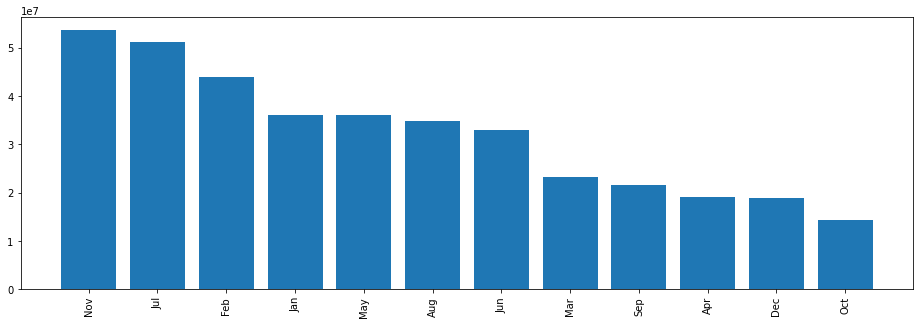

In [124]:
# Run this cell without changes

# Set up plots
fig = plt.subplots( figsize=(16, 5))

months = top_months['Month']
gross_profit = top_months['worldwide_gross']
# Plot data
plt.bar(months, gross_profit)

# Customize appearance
plt.tick_params(axis="x", labelrotation=90)
plt.x_label("Months")
plt.set_ylabel("Worldwide Profit")
plt.set_title("Release Months with Highest Worldwide Profits")
plt.show()


In [ ]:
recent_movie_years.groupby('Year')[['worldwide_gross']].mean().sort_values(by='worldwide_gross', ascending=False).head()


,worldwide_gross
Year,
2018,1.824786e+08
2017,1.692240e+08
2016,1.313614e+08
2012,1.156729e+08
2013,1.107553e+08
